/var/folders/dc/8z7j2w813y3_j_t1330nl9m40000gq/T/ipykernel_3412/1301074955.py:20: RuntimeWarning: divide by zero encountered in log10
  log_length = np.log10(lengths)


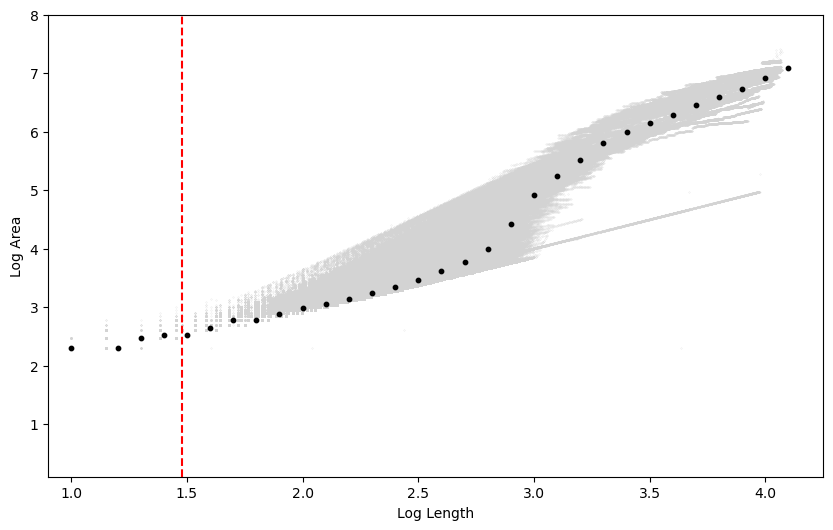

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import statsmodels.api as sm
import pickle as p

from TopoAnalysis import dem as d

conc = '01' # Choose 01, 03, or 05
prefix = f'conc_{conc}_Rf05percent_1.0'
directory = 'path/to/folder/' + 'Landscape_evolution_models/'
elev = d.Elevation.load(directory + prefix + '_filled')
fd = d.FlowDirectionD8.load(directory + prefix + '_flow_direction')
area = d.Area.load(directory + prefix + '_area')
length = d.FlowLength.load(directory + prefix + '_length')
    
# Convert to logarithmic scale
lengths = length._griddata.flatten()
areas = area._griddata.flatten()
log_length = np.log10(lengths)
log_area = np.log10(areas)

# Preparing binned data
binned_log_length = np.arange(0, 10, 0.1)
mean_log_area = np.zeros_like(binned_log_length)
mean_peclet = np.zeros_like(binned_log_length)

# Calculate mean log area for each bin
for i, bll in enumerate(binned_log_length):
    indices = np.where(np.logical_and(log_length < bll + 0.05, log_length >= bll - 0.05))
    if len(indices[0]) > 0:
        mean_log_area[i] = np.mean(log_area[indices])
    else:
        mean_log_area[i] = np.nan  # Assign NaN if there are no elements in the bin

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(log_length, log_area, color='lightgray', marker='.', s=0.1)
plt.scatter(binned_log_length, mean_log_area, color='black', s=10)  # Plot as black dots

plt.xlabel('Log Length')
plt.ylabel('Log Area')
plt.ylim(0.1,8)
plt.xlim(0.9,4.25)

# Add a vertical line at log-transformed 30 meters
log_value_30m = np.log10(30)
plt.axvline(x=log_value_30m, color='red', linestyle='--')

# Show the plot

plt.show()